# Final Project – Introduction to Machine Learning (Group 32)
## Loan Approval Prediction – Binary Classification
**Tamar & Tala – Spring 2025**

This notebook walks through our end-to-end machine learning project:
- Data exploration 
- Feature processing 
- Model training 
- Evaluation 
- Final prediction submission 

## 1. Load Libraries and Data
_We’ll start by loading the data and setting up useful libraries._

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report

import missingno as msno


from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer



# Load the data
train = pd.read_csv('train.csv', na_values=["?"])
test = pd.read_csv('test.csv', na_values=["?"])
train.head()

,customer_id,Age,Employment_Type,A,Education_Level,Years_of_Education,Marital_Status,Job_Type,Household_Role,Ethnicity,...,Investment_Gain,Investment_Loss,Weekly_Work_Hours,Country_of_Residence,C,Preferred_Communication_Method,D,B,E,Loan_Approval
0,115892,90.0,NaN,77053,HS-grad,9.0,Widowed,NaN,Not-in-family,White,...,0.0,4356.0,40,United-States,104.906221,Phone_Call,2.865629,NaN,170.887465,0
1,115893,82.0,Private,132870,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,...,0.0,4356.0,18,United-States,96.358501,mail,5.528583,NaN,156.630201,0
2,115895,54.0,Private,140359,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,...,0.0,3900.0,40,United-States,115.529631,mail,3.816915,NaN,165.635557,0
3,115896,41.0,Private,264663,Some-college,10.0,Separated,Prof-specialty,Own-child,White,...,0.0,3900.0,40,United-States,85.732506,NaN,5.416363,NaN,123.379007,0
4,115897,34.0,Private,216864,HS-grad,9.0,Divorced,Other-service,Unmarried,White,...,NaN,3770.0,45,United-States,115.218443,Mail,6.453932,NaN,155.262131,0


## 2. Exploratory Data Analysis (EDA)
_Let's understand the data structure, spot missing values, and explore correlations._


**Answer in markdown:**
- Are there outliers?
- Are there missing values?
- Any early ideas on important features?

In [139]:
n_rows,n_columns = train.shape
(n_rows,n_columns)

(27676, 21)

In [140]:
train.describe()

,customer_id,Age,A,Years_of_Education,Investment_Gain,Investment_Loss,Weekly_Work_Hours,C,D,B,E,Loan_Approval
count,27676.000000,27541.000000,2.767600e+04,27122.000000,26846.000000,27647.000000,27676.000000,26561.000000,27676.000000,0.0,24389.000000,27676.000000
mean,132196.289854,38.597727,1.898849e+05,10.079972,1091.680101,86.084458,40.482151,99.957601,4.987450,NaN,139.251615,0.240786
std,9399.839425,13.636965,1.053593e+05,2.575332,7482.292675,400.504134,12.371156,9.911054,1.511751,NaN,13.708225,0.427569
min,115892.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,58.136513,-1.711896,NaN,82.675954,0.000000
25%,124043.750000,28.000000,1.177652e+05,9.000000,0.000000,0.000000,40.000000,93.273986,3.968762,NaN,129.783073,0.000000
50%,132222.500000,37.000000,1.785870e+05,10.000000,0.000000,0.000000,40.000000,99.903569,4.994815,NaN,139.078247,0.000000
75%,140322.500000,48.000000,2.376340e+05,12.000000,0.000000,0.000000,45.000000,106.636563,5.999440,NaN,148.488675,0.000000
max,148452.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,144.309842,10.876204,NaN,199.134411,1.000000


In [143]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27676 entries, 0 to 27675
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     27676 non-null  int64  
 1   Age                             27541 non-null  float64
 2   Employment_Type                 25865 non-null  object 
 3   A                               27676 non-null  int64  
 4   Education_Level                 27676 non-null  object 
 5   Years_of_Education              27122 non-null  float64
 6   Marital_Status                  27676 non-null  object 
 7   Job_Type                        24305 non-null  object 
 8   Household_Role                  27676 non-null  object 
 9   Ethnicity                       24912 non-null  object 
 10  Gender                          27676 non-null  object 
 11  Investment_Gain                 26846 non-null  float64
 12  Investment_Loss                 

Column B is completely empty (100% missing), so we will remove it from the dataset.
Several columns, such as Employment_Type, Job_Type and Ethnicity have a high percentage of missing values.
We'll need to decide whether to fill them or drop them.

_Visualizing the variables to check their distributions:_

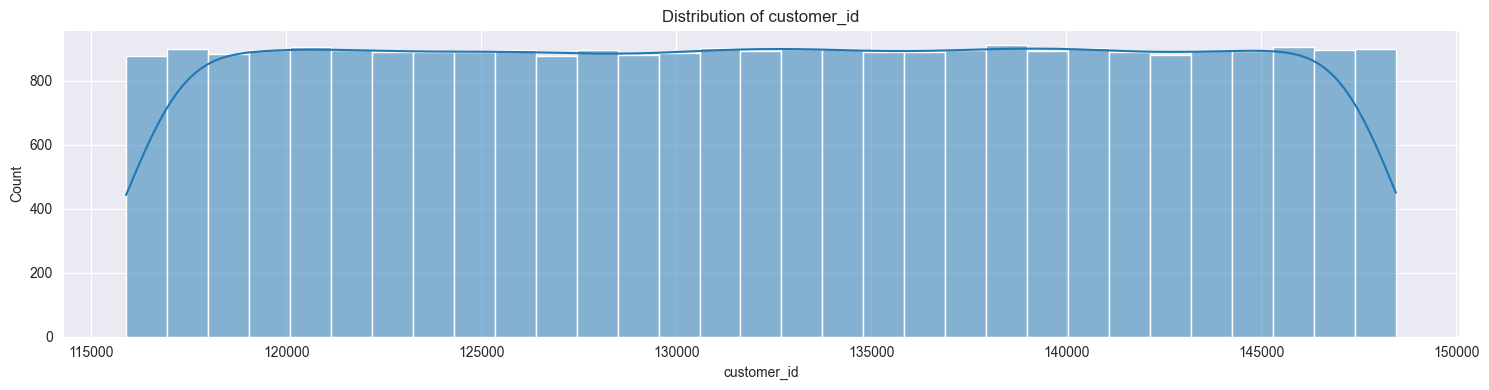

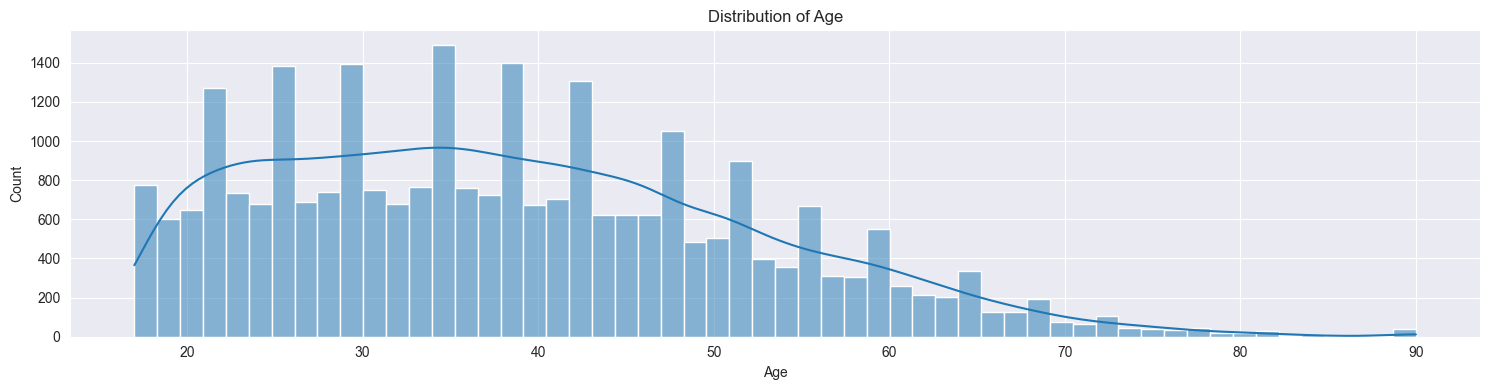

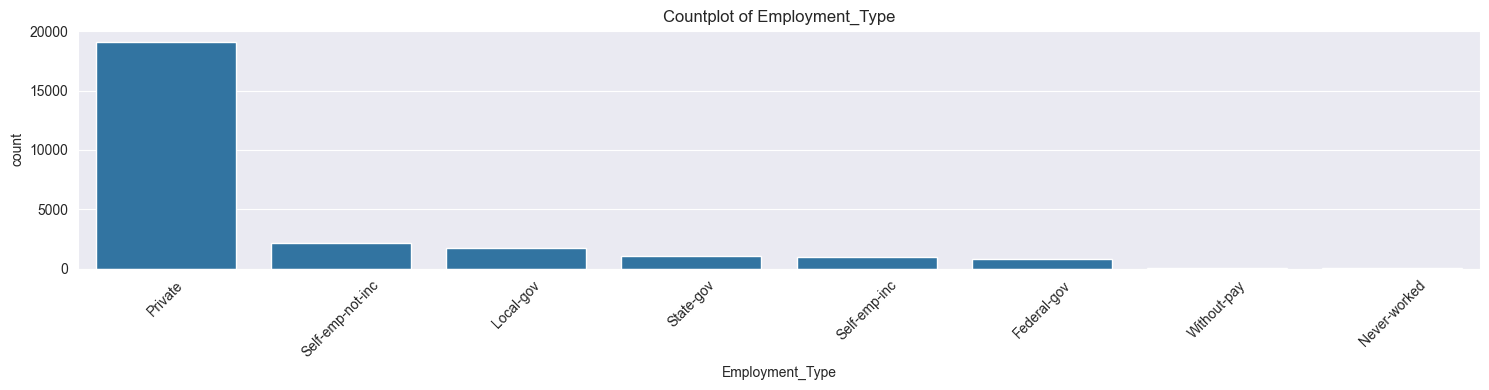

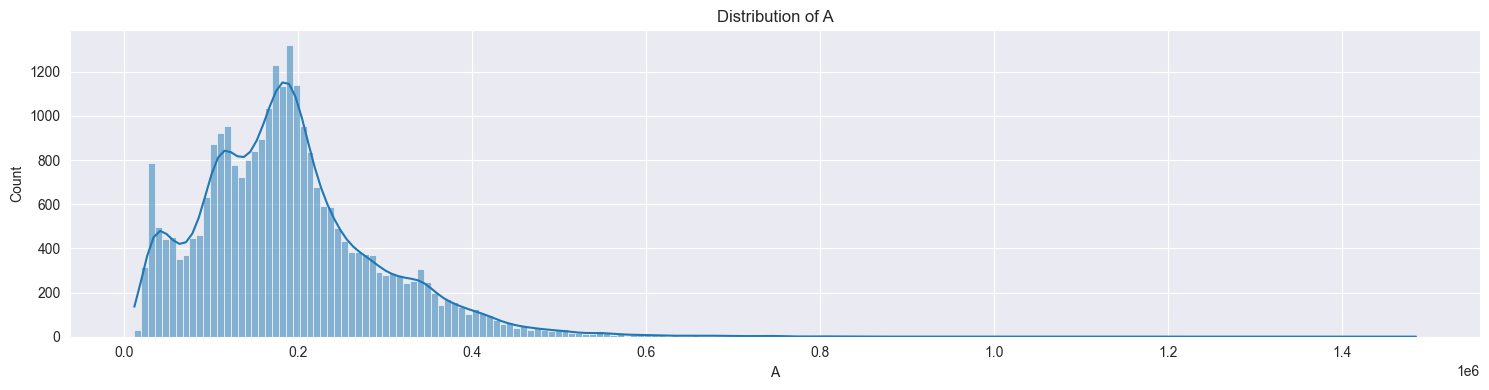

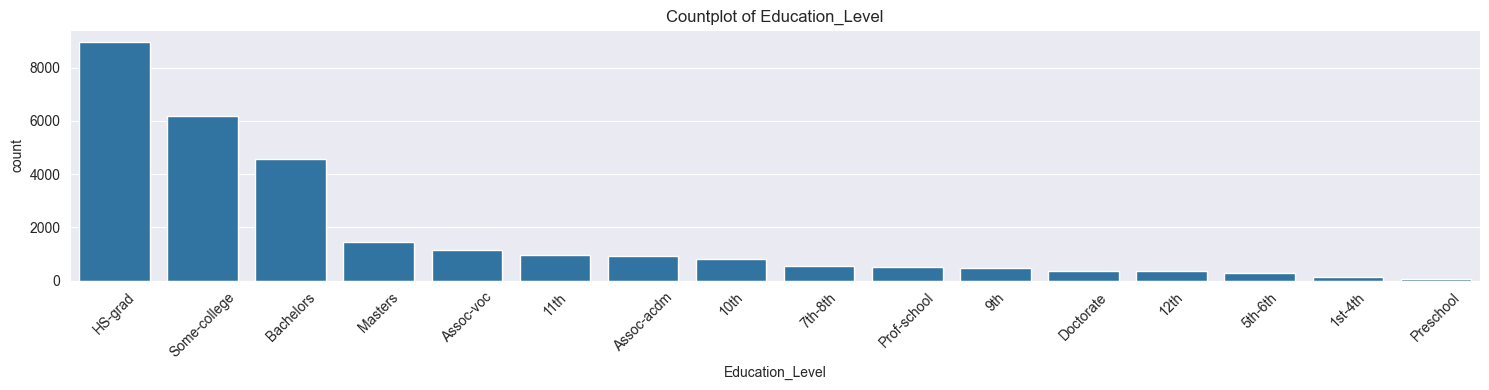

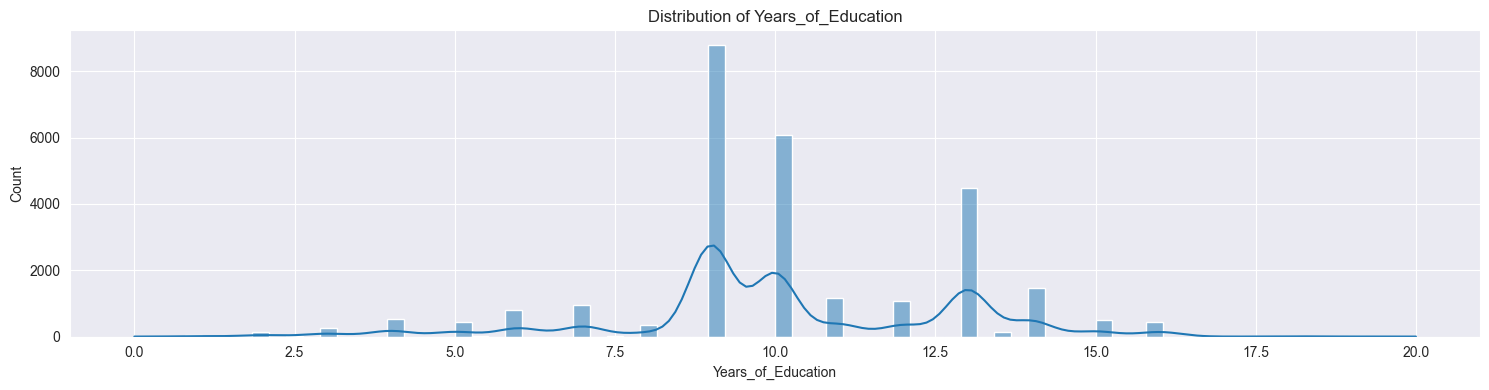

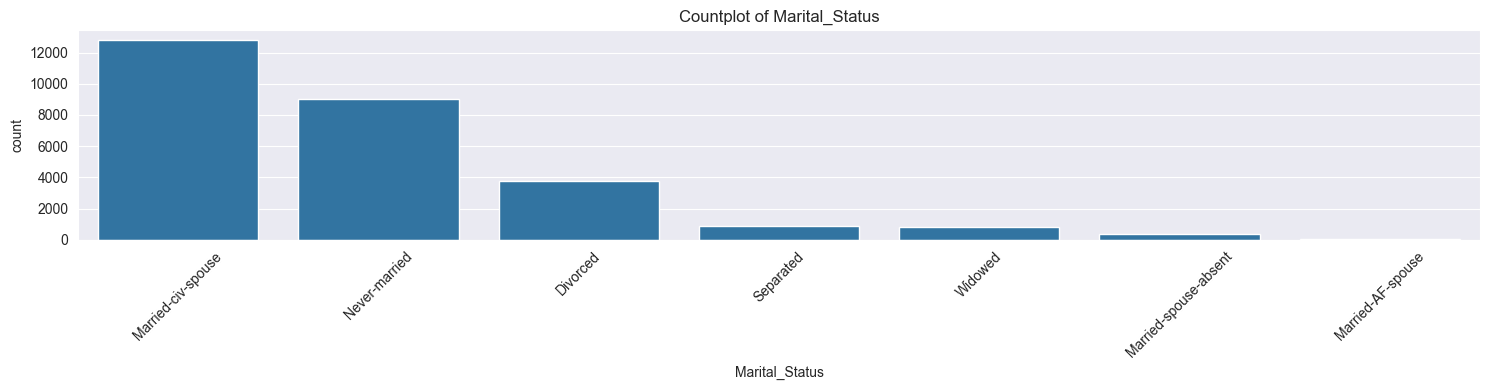

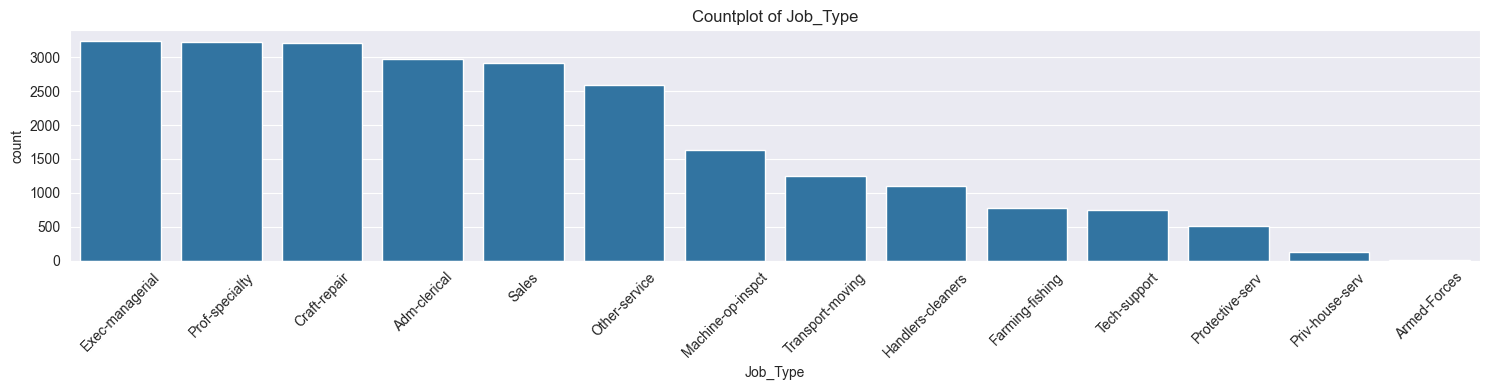

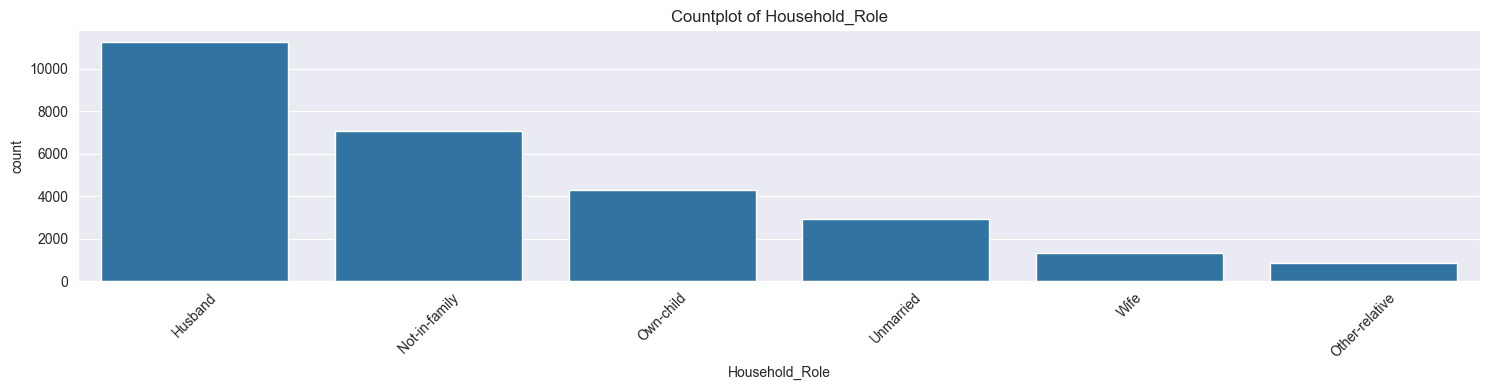

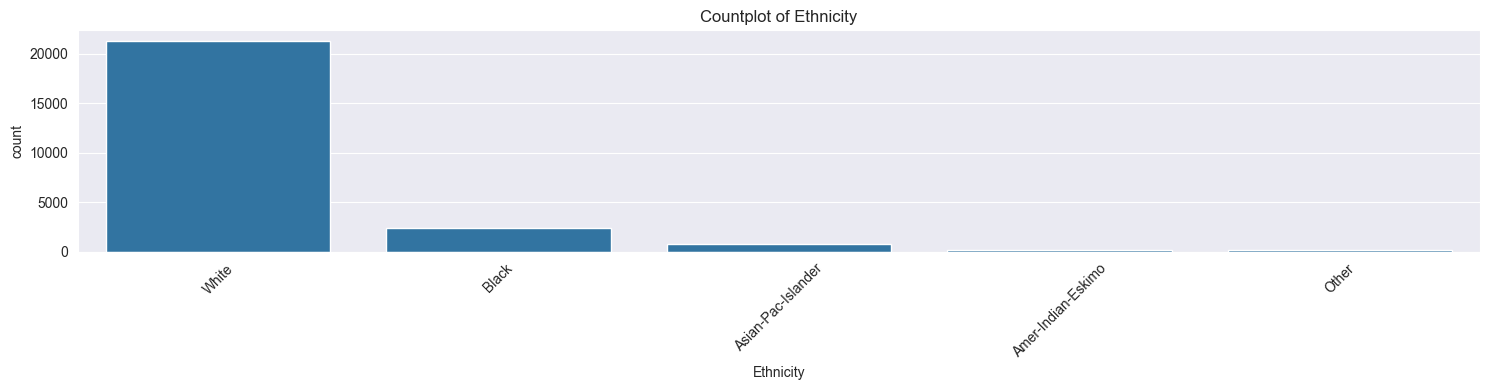

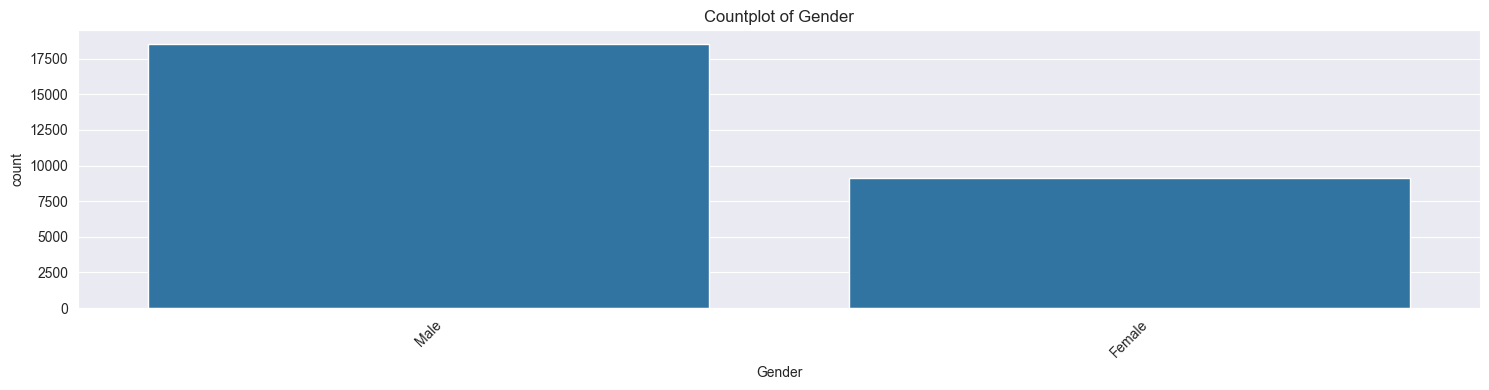

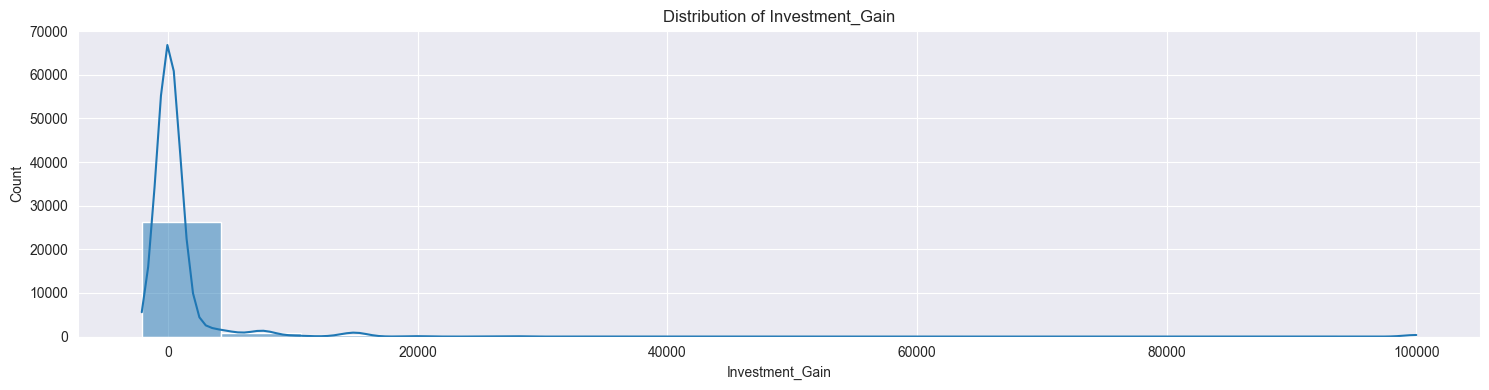

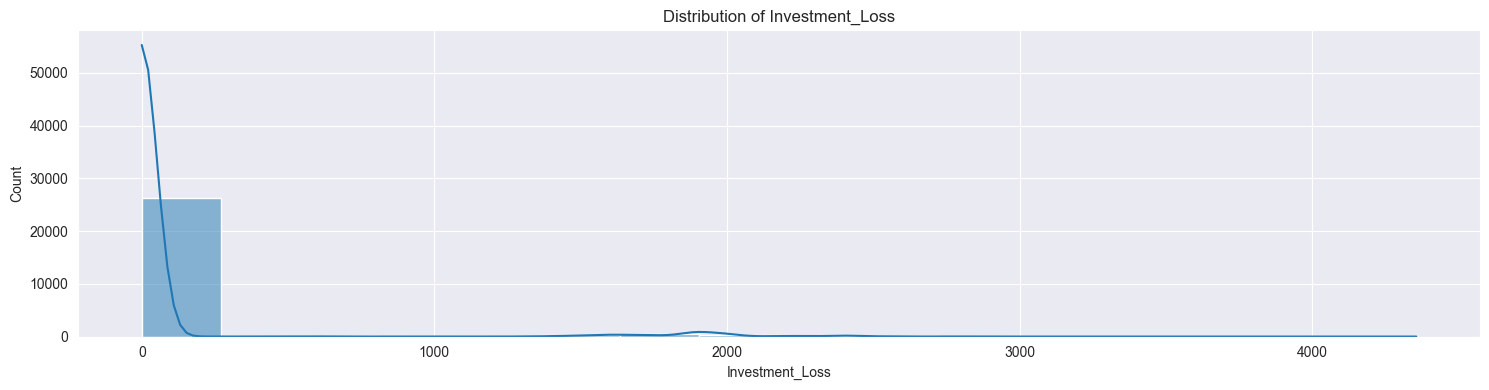

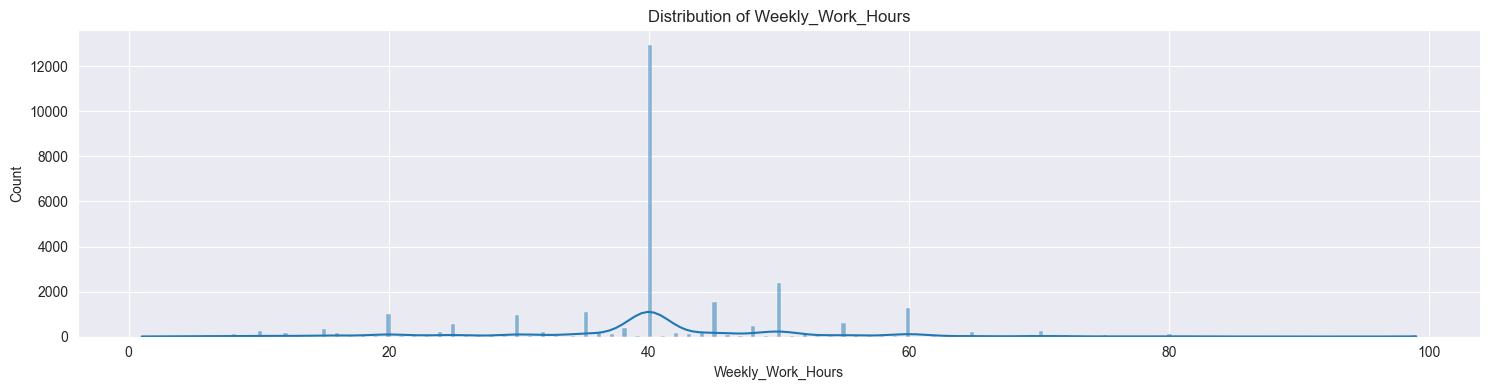

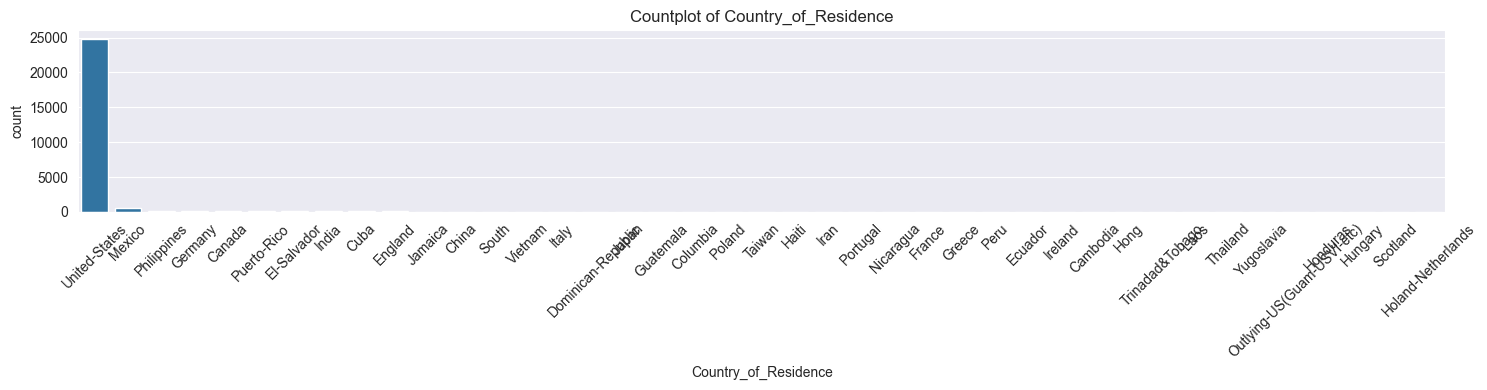

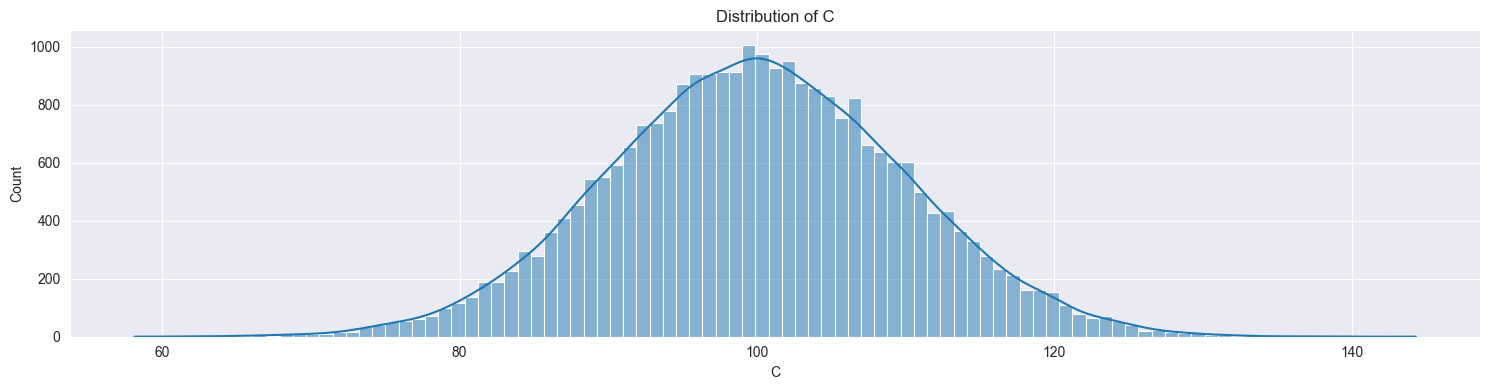

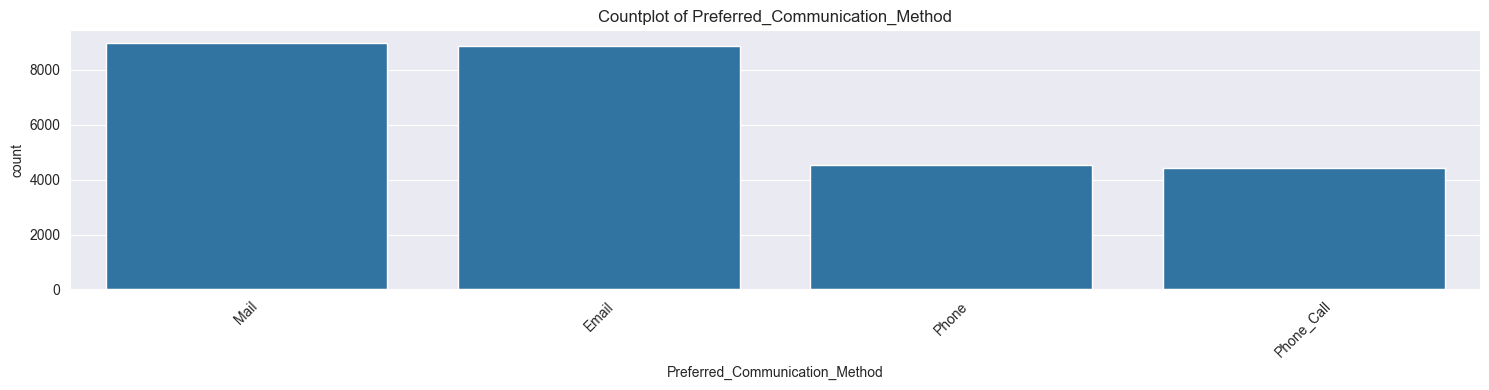

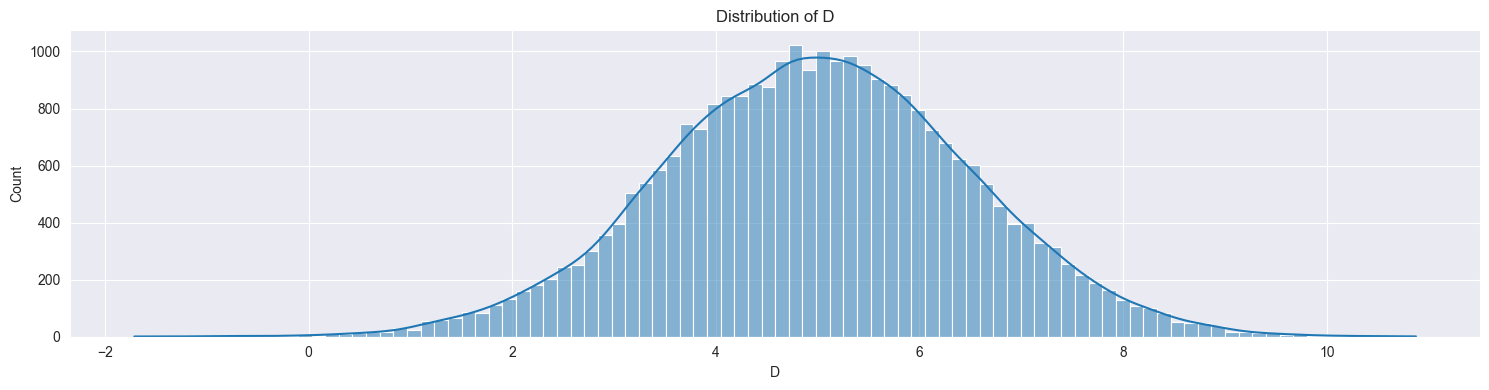

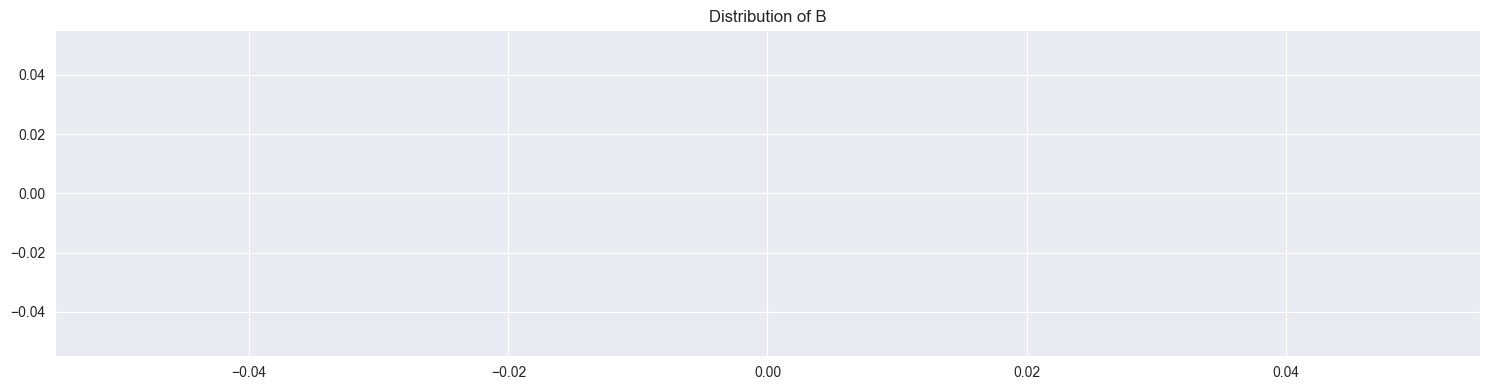

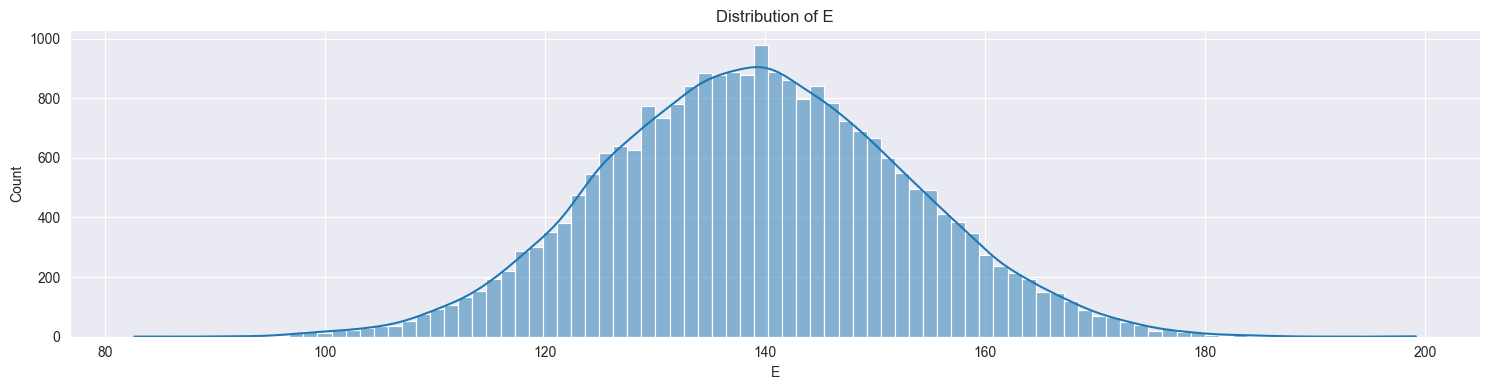

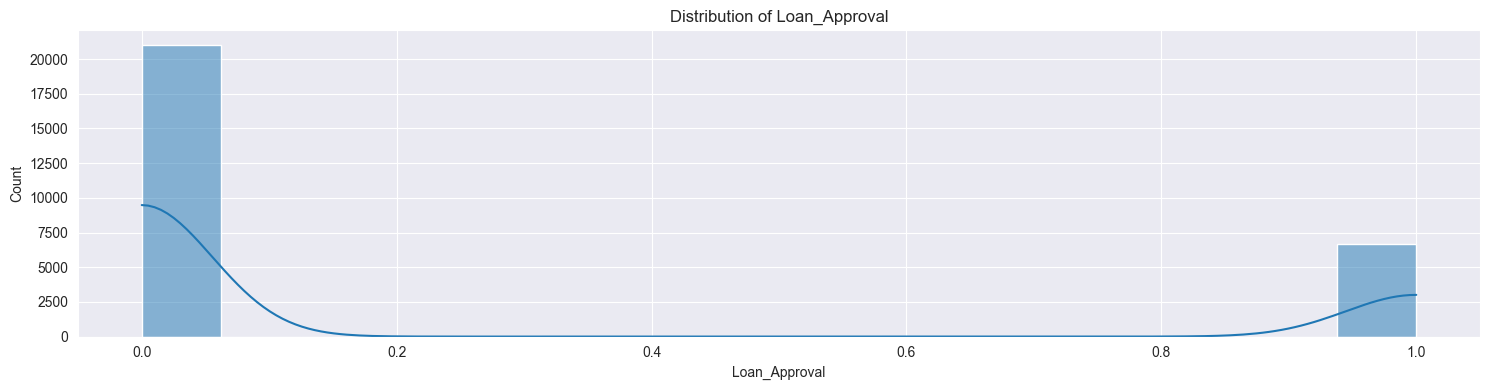

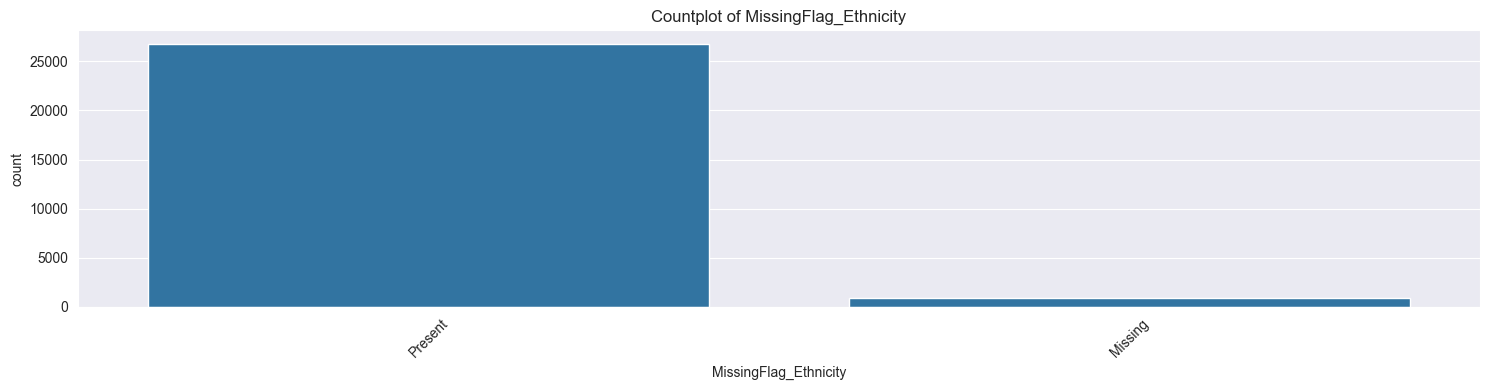

In [211]:
# Histograms and count plots of each explanatory variable

for col in train.columns:
    plt.figure(figsize=(15, 4))
    
    # For numeric variables
    if pd.api.types.is_numeric_dtype(train[col]):
        sns.histplot(train[col].dropna(), kde=True)
        plt.title(f"Distribution of {col}")
    
    # For categorical variables 
    else:
        sns.countplot(x=col, data=train, order=train[col].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f"Countplot of {col}")
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Bar plots of approval rates for categorical variables

categorical_vars = [
    'Employment_Type', 'Education_Level', 'Marital_Status', 'Job_Type',
    'Household_Role', 'Ethnicity', 'Gender', 'Country_of_Residence',
    'Preferred_Communication_Method'
]

for col in categorical_vars:
    plt.figure(figsize=(15, 4))
    sns.barplot(x=col, y='Loan_Approval', data=train, estimator='mean', order=train[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Approval Rate by {col}')
    plt.ylabel('Approval Rate (Mean of Loan_approval)')
    plt.tight_layout()
    plt.show()

In [ ]:
#Box plots of approved vs. rejected for numerical variables
train['Loan_Approval_str'] = train['Loan_Approval'].map({0: 'Rejected', 1: 'Approved'})

# Remove columns that shouldn't be plotted
numeric_cols = [col for col in train.select_dtypes(include='number').columns if col not in ['customer_id', 'Loan_Approval']]

# Create one boxplot per feature vs Loan Approval
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Loan_Approval_str', y=col, data=train)
    plt.title(f'{col} by Loan Approval')
    plt.xlabel('Loan Approval')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

**Key Insights from Feature Distributions**
1. Employment_Type, Country_of_Residence and Ethnicity are highly imbalanced.
To reduce sparsity and improve generalization, we will group the less frequent categories into broader, more meaningful groups.
2. A is right-skewed, so a log transformation may help normalize its distribution.
3. Investment_Gain and Investment_Loss are extremely skewed with large outliers, so a log transformation might help, and merging them into a single Net_Investment feature may provide a clearer signal.
4. Preferred_Communication_Method has inconsistent values due to variations in capitalization and wording (e.g., "Email" vs "email").
5. Based on the approval rate bar plot for Household_Role, we observed clear patterns across the categories.
We grouped them into three broader categories with similar approval behavior to simplify the feature and improve model stability.


In [ ]:
#Creating a heatmap

# Select only numeric columns
numeric_df = train.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [ ]:
# Checking which variables are most correlated with Loan_approval (only linear) - this is the Loan_Approval row in the heatmap
numeric_df = train.select_dtypes(include='number')
correlations = numeric_df.corr()['Loan_Approval'].sort_values(ascending=False)
print(correlations)

**Key Insights from the heat map**
1. C and E are highly correlated. we will consider dropping one of them.

We checked for overlap between Employment_Type and Job_Type using a cross-tabulation heatmap.
The results show no strong or consistent relationship between the two — most employment types are associated with a wide variety of job types.
Therefore, we concluded that the two features capture distinct information and chose to keep both.

In [ ]:
crosstab = pd.crosstab(train['Employment_Type'], train['Job_Type'], normalize='index')
plt.figure(figsize=(14, 7))
sns.heatmap(crosstab, cmap="Blues", annot=True, fmt=".2f")
plt.title("Employment Type vs Job Type")
plt.show()

By looking at the structure of the dataset, we noticed a few things:

1. Column B is completely empty, so we decided to remove it.
2. Preferred_Communication_Method has inconsistent entries due to differences in capitalization and wording, so we unified similar values.
3. We simplified the Country_of_Residence feature by grouping it into three categories: USA, Mexico, and Other. The vast majority of people were from the United States, and the approval rate among other countries wasn't very different.
4. We simplified the Employment_Type feature by grouping it into four categories: Private, not private and, and non-working.  The vast majority of people were private, and the noticeable difference in the approval rate was between non-private to non-working.
5. We combined Investment_Gain and Investment_Loss into a single feature, Net_Investment, to better capture overall financial status.
6. C and E are highly correlated (r = 0.87), indicating redundancy.
Neither has a strong linear correlation with the target, but E shows a slightly stronger signal (r = 0.125). Even though E has more missing values (as we will see later on), it’s still more useful, so we’ll keep E and drop C. 



In [83]:
# 1. Removing columns B and C
train = train.drop(['B', 'C'], axis=1)
test = test.drop(['B', 'C'], axis=1)
n_columns -= 2

In [202]:
# 2. unifying similar values in Preferred_Communication_Method:
train['Preferred_Communication_Method'] = train['Preferred_Communication_Method'].replace({
    'mail': 'Mail',
    'email': 'Email',
    'phone': 'Phone',
    'phone call': 'Phone'
})
test['Preferred_Communication_Method'] = test['Preferred_Communication_Method'].replace({
    'mail': 'Mail',
    'email': 'Email',
    'phone': 'Phone',
    'phone call': 'Phone'
})

In [85]:
# Grouping Country_of_Residence
def group_country(country):
    if country == "United-States":
        return "USA"
    elif country == "Mexico":
        return "Mexico"
    else:
        return "Other"
    
train['Country_of_Residence'] = train['Country_of_Residence'].apply(group_country)

In [86]:
# Grouping Education_Level
def group_education(edu):
    pre_school = ['Preschool']
    school = ['1st-4th', '5th-6th', '9th', '10th', '11th', '12th', '7th-8th']
    post_hs = ['HS-grad', 'Some-college']
    assoc = ['Assoc-voc', 'Assoc-acdm']
    higher = ['Masters', 'Bachelors']
    postgraduate = ['Doctorate', 'Prof-school']
    
    if edu in pre_school:
        return 'pre_school'
    elif edu in school:
        return 'school'
    elif edu in post_hs:
        return 'post_hs'
    elif edu in assoc:
        return 'assoc'
    elif edu in higher:
        return 'higher'
    elif edu in postgraduate:
        return 'postgraduate'
    else:
        return 'Other'
    
train['Education_Level'] = train['Education_Level'].apply(group_education)

In [87]:
def group_household_role(role):
    if role in ['Husband', 'Wife']:
        return 'Spouse'
    else:
        return 'Other'

train['Household_Role'] = train['Household_Role'].apply(group_household_role)
test['Household_Role'] = test['Household_Role'].apply(group_household_role)

In [88]:
def group_employment(emp):
    if emp == 'Private':
        return 'Private'
    elif emp in ['Self-emp-not-inc', 'Self-emp-inc', 'Local-gov', 'State-gov', 'Federal-gov']:
        return 'Not-Private'
    elif emp in ['Without-pay', 'Never-worked']:
        return 'Non-working'
    else:
        return 'Other'
    
    train['Employment_Grouped'] = train['Employment_Type'].apply(group_employment)

In [89]:
def group_ethnicity(eth):
    if eth == 'White':
        return 'White'
    elif eth == 'Black':
        return 'Black'
    else:
        return 'Other'
        

    train['Ethnicity'] = train['Ethnicity'].apply(group_ethnicity)

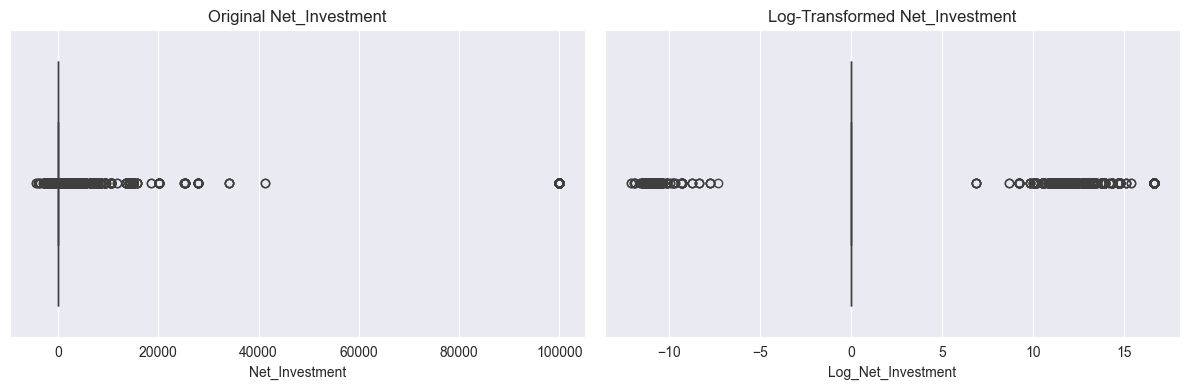

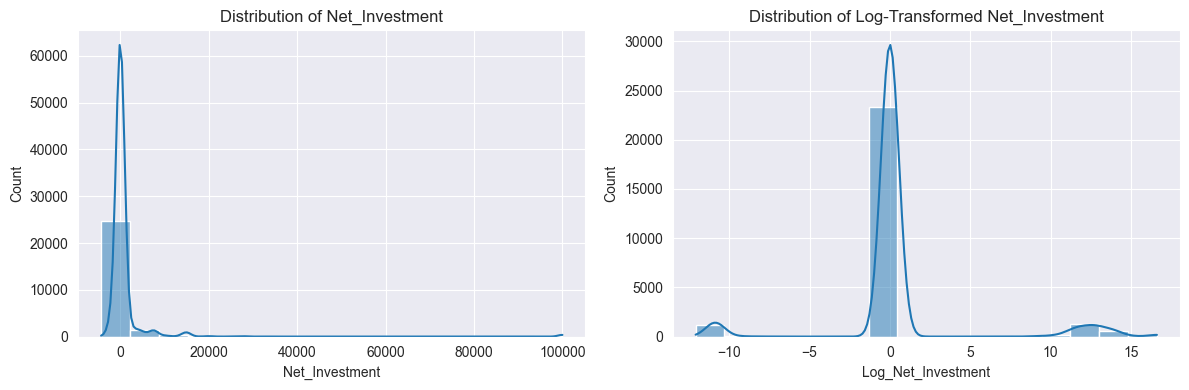

In [145]:
'''
'#Doing a log transformation while still distinguishing losses vs. gains.
train['Net_Investment'] = train['Investment_Gain'] - train['Investment_Loss']
test['Net_Investment'] = test['Investment_Gain'] - test['Investment_Loss']

train['Log_Net_Investment'] = np.sign(train['Net_Investment']) * np.log2(abs(train['Net_Investment']) + 1)
test['Log_Net_Investment'] = np.sign(test['Net_Investment']) * np.log2(abs(test['Net_Investment']) + 1)


# Side-by-side boxplots 
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x=train['Net_Investment'], ax=axes[0])
axes[0].set_title('Original Net_Investment')
axes[0].set_xlabel('Net_Investment')

sns.boxplot(x=train['Log_Net_Investment'], ax=axes[1])
axes[1].set_title('Log-Transformed Net_Investment')
axes[1].set_xlabel('Log_Net_Investment')

plt.tight_layout()
plt.show()

# Side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(train['Net_Investment'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribution of Net_Investment')
axes[0].set_xlabel('Net_Investment')

sns.histplot(train['Log_Net_Investment'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribution of Log-Transformed Net_Investment')
axes[1].set_xlabel('Log_Net_Investment')

plt.tight_layout()
plt.show()
'''

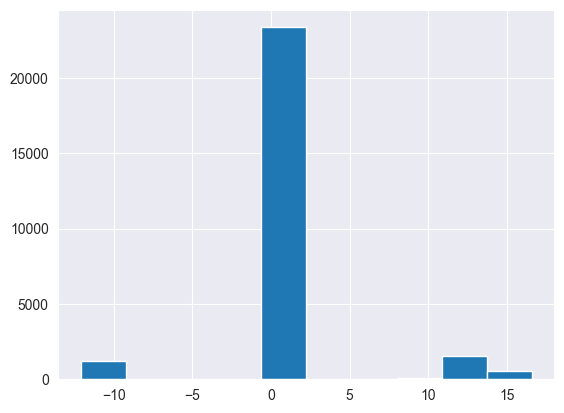

Text(0.5, 1.0, 'Distribution of net_investment_log')

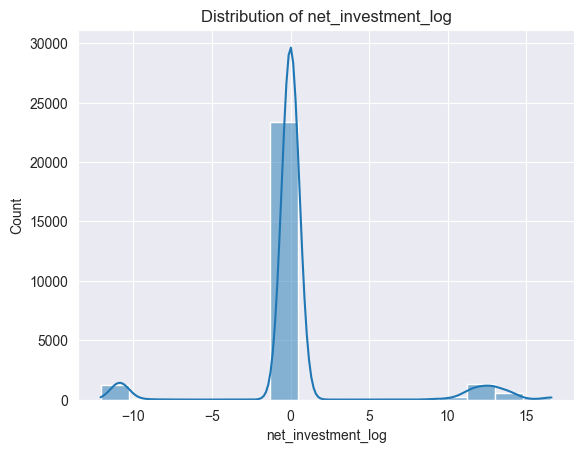

In [188]:


train['log_gain'] = np.log2(train['Investment_Gain'] + 1)
train['log_loss'] = np.log2(train['Investment_Loss'] + 1)
train['net_investment_log'] = train['log_gain'] - train['log_loss']

plt.hist(train['net_investment_log'])
plt.show()

sns.histplot(train['net_investment_log'].dropna(), kde=True)
plt.title(f"Distribution of net_investment_log")



We now have a few ways of dealing with the investments: 
1. keeping each one in the original way.
2. keeping each one with a log transformation.
3. Log on each one and then difference
4. Difference and then log on each one.

we will need to do some cross-validation and check which one gives the best results.

We applied a log transformation to Net_Investment to reduce skew and compress extreme outliers.
The resulting distribution is more symmetric, so we will keep it.


We applied a log transformation to column A to reduce skew and potentially improve its relationship with the target.
However, the correlation with Loan_Approval remained low, so we won't use it.

In [ ]:
pd.crosstab(train['Loan_Approval'], train['Gender'])
pd.crosstab(train['Loan_Approval'], train['Ethnicity'], normalize='index')
pd.crosstab(train['Loan_Approval'], train['Education_Level'], normalize='index')
pd.crosstab(train['Loan_Approval_str'], train['Gender'], normalize='index')

# Doesn't really help because of the unbalanced proportions. Add an explanation.


In [189]:
# AFTER CHANGING 

# Checking which variables are most correlated with Loan_approval (only linear):
numeric_df = train.select_dtypes(include='number')
correlations = numeric_df.corr()['Loan_Approval'].sort_values(ascending=False)
print(correlations)

Loan_Approval         1.000000
Years_of_Education    0.329367
log_gain              0.288976
Age                   0.234235
Weekly_Work_Hours     0.226344
Investment_Gain       0.223620
Net_Investment        0.214792
Log_Net_Investment    0.161561
net_investment_log    0.161561
Investment_Loss       0.152074
log_loss              0.141956
E                     0.124523
C                     0.010044
D                     0.000003
A                    -0.011856
customer_id          -0.179697
B                          NaN
Name: Loan_Approval, dtype: float64


In [197]:
# Handling missing Years_Of_Education using the categorical Education_level
# 1. Define the mapping (as in the UCI Adult dataset’s education-num)
edu_to_years = {
    'Preschool'   : 0,
    '1st-4th'     : (1+2+3+4)/4,
    '5th-6th'     : 5.5,
    '7th-8th'     : 7.5,
    '9th'         : 9,
    '10th'        : 10,
    '11th'        : 11,
    '12th'        : 12,
    'HS-grad'     : 12,
    'Some-college': (12+13+14+15)/4,
    'Assoc-voc'   : 14,
    'Assoc-acdm'  : 14,
    'Bachelors'   : 16,
    'Masters'     : 18,
    'Prof-school' : 19,  
    'Doctorate'   : 20   
}

# 2. Fill missing based on that map
for df in (train, test):
    df['Years_of_Education'] = df['Years_of_Education'].fillna(
        df['Education_Level'].map(edu_to_years)
    )


## 3. Data Preprocessing
_Handle missing values, encode categorical features, normalize, etc._

**✏️ Answer in markdown:**
- Did you normalize the data? Why?
- How did you handle categorical variables?
- Did you apply PCA or feature selection?
- Did you drop or create new features?


In [200]:
# Understanding missing values - Check how many missing values there are in each column and if it has a pattern
missing = train.isnull().sum()
missing_percent = (missing / len(train)) * 100

print(missing_percent.sort_values(ascending=False))

# Plot missing value matrix
#msno.matrix(train)

B                                 100.000000
Job_Type                           12.180228
E                                  11.876716
Ethnicity                           9.986992
Employment_Type                     6.543576
C                                   4.028761
Preferred_Communication_Method      3.121838
Country_of_Residence                1.792166
Age                                 0.487787
Investment_Loss                     0.104784
customer_id                         0.000000
Weekly_Work_Hours                   0.000000
D                                   0.000000
Gender                              0.000000
Investment_Gain                     0.000000
Household_Role                      0.000000
Marital_Status                      0.000000
Years_of_Education                  0.000000
Education_Level                     0.000000
A                                   0.000000
Loan_Approval                       0.000000
dtype: float64


In [199]:
######## TRY AGAIN AFTER ADDING AGE
'''
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

df = train  

# 1. Define features & split known vs missing
features = ['Weekly_Work_Hours', 'Years_of_Education', 'Age']
known   = df[df['Investment_Gain'].notnull() ].copy()
missing = df[df['Investment_Gain'].isnull()].copy()

X_known = known[features]
y_known = known['Investment_Gain']

# 2. Hold out 20% for validation
X_tr, X_val, y_tr, y_val = train_test_split(
    X_known, y_known,
    test_size=0.2,
    random_state=42
)

# 3. Train on the 80%
lr = LinearRegression()
lr.fit(X_tr, y_tr)

# 4. Predict on the hold‐out and evaluate
y_pred = lr.predict(X_val)
print(f"R² on hold-out: {r2_score(y_val, y_pred):.3f}")
print(f"MAE on hold-out: {mean_absolute_error(y_val, y_pred):.3f}")

# 5. (Optional) Retrain on ALL known data and impute missings
lr_full = LinearRegression()
lr_full.fit(X_known, y_known)

X_missing = missing[features]
df.loc[df['Investment_Gain'].isnull(), 'Investment_Gain'] = lr_full.predict(X_missing)
'''


R² on hold-out: 0.020
MAE on hold-out: 2125.763


We tried to handle the missing values with linear regression, but R^2 was 0.02, so we just impute with the median.

The plot shows that column B is completely empty, so we should remove it. The rest of the columns have some missing values, but there doesn’t seem to be any clear pattern.

In [210]:
# OPTION 1: put missing (better with stuff like trees:  ['Job_Type', 'Ethnicity']

# Define the columns
categorical_col = ['Job_Type', 'Ethnicity', 'Preferred_Communication_Method']
categorical_col_majority = ['Country_Of_Residence', 'Ethnicity']
numerical_col = ['E', 'C']
skw_numerical_col = ['Age', 'Investment_gain', 'Investment_Loss']

# Pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline for categorical features with distinct majorities
cat_maj_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


# Pipeline for numerical features (mean imputation)
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

# Pipeline for numerical features (median imputation) - for skewed columns
skw_numerical_col = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])


# Combine both pipelines into a ColumnTransformer
preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, [categorical_col]),
    ('num', num_pipeline, [numerical_col]),
    ('skw_num', skw_numerical_col, [skw_numerical_col]),
    'cat_maj', cat_maj_pipeline, [categorical_col_majority]
])

In [152]:
# 1. Create a boolean mask for missingness - job type
mask_Job_Type = train['Job_Type'].isna()            # True where missing
train['MissingFlag_Job_Type'] = mask_Job_Type.map({True: 'Missing', False: 'Present'})

# 2. Summary statistics for numeric vars
numeric_cols = ['Log_Net_Investment']
#numeric_cols = ['Age', 'Years_of_Education', 'Weekly_Work_Hours', 'Net_Investment', 'A', 'D', 'E']
print(train.groupby('MissingFlag_Job_Type')[numeric_cols].describe().unstack(1))

''' bring back after - just sick of the big graphs.
# 4. Frequencies for other categorical vars
cat_cols = ['Marital_Status', 'Household_Role', ]
for col in cat_cols:
    freq = pd.crosstab(train['MissingFlag_Job_Type'], train[col], normalize='index')
    print(f'\nRelative frequency of {col}:\n', freq)
    freq.plot.bar(stacked=True)
    plt.title(f'{col} by missingness')
    plt.ylabel('Proportion')
    plt.show()

'''

                           MissingFlag_Job_Type
Log_Net_Investment  count  Missing                  3276.000000
                           Present                 23541.000000
                    mean   Missing                     0.490988
                           Present                     0.575761
                    std    Missing                     4.145351
                           Present                     4.354923
                    min    Missing                   -12.089119
                           Present                   -12.089119
                    25%    Missing                     0.000000
                           Present                     0.000000
                    50%    Missing                     0.000000
                           Present                     0.000000
                    75%    Missing                     0.000000
                           Present                     0.000000
                    max    Missing                    16

In [154]:
# 1. Create a boolean mask for missingness with Investment_Gain to see if we can delete it to use YJ
mask_Investment_Gain = train['Investment_Gain'].isna()            # True where missing
train['MissingFlag_Investment_Gain'] = mask_Investment_Gain.map({True: 'Missing', False: 'Present'})

# 2. Summary statistics for numeric vars
numeric_cols = ['E']
#numeric_cols = ['Age', 'Years_of_Education', 'Weekly_Work_Hours', 'A', 'D', 'E']
print(train.groupby('MissingFlag_Investment_Gain')[numeric_cols].describe().unstack(1))


''' bring back after - just sick of the big graphs.

# 4. Frequencies for other categorical vars
cat_cols = ['Marital_Status', 'Household_Role', ]
for col in cat_cols:
    freq = pd.crosstab(train['MissingFlag_Investment_Gain'], train[col], normalize='index')
    print(f'\nRelative frequency of {col}:\n', freq)
    freq.plot.bar(stacked=True)
    plt.title(f'{col} by missingness')
    plt.ylabel('Proportion')
    plt.show()
'''

          MissingFlag_Investment_Gain
E  count  Missing                          730.000000
          Present                        23659.000000
   mean   Missing                          139.901668
          Present                          139.231558
   std    Missing                           13.675169
          Present                           13.709042
   min    Missing                          101.186564
          Present                           82.675954
   25%    Missing                          130.576637
          Present                          129.763412
   50%    Missing                          139.807639
          Present                          139.050834
   75%    Missing                          148.378851
          Present                          148.494231
   max    Missing                          183.996930
          Present                          199.134411
dtype: float64
Index(['customer_id', 'Age', 'Employment_Type', 'A', 'Education_Level',
       'Yea

In [180]:
# 1. Create a boolean mask for missingness with Ethnicity
mask_Ethnicity = train['Ethnicity'].isna()            # True where missing
train['MissingFlag_Ethnicity'] = mask_Ethnicity.map({True: 'Missing', False: 'Present'})

# 2. Summary statistics for numeric vars
numeric_cols = ['D']
#numeric_cols = ['Age', 'Years_of_Education', 'Weekly_Work_Hours', 'A', 'D', 'E']
print(train.groupby('MissingFlag_Ethnicity')[numeric_cols].describe().unstack(1))

'''
#bring back after - just sick of the big graphs.

# 4. Frequencies for other categorical vars
cat_cols = ['Marital_Status', 'Household_Role', 'Employment_Type', 'Job_Type', 'Gender', 'Country_of_Residence', 'Preferred_Communication_Method']
for col in cat_cols:
    freq = pd.crosstab(train['MissingFlag_Ethnicity'], train[col], normalize='index')
    print(f'\nRelative frequency of {col}:\n', freq)
    freq.plot.bar(stacked=True)
    plt.title(f'{col} by missingness')
    plt.ylabel('Proportion')
    plt.show()
'''

          MissingFlag_Ethnicity
D  count  Missing                   2764.000000
          Present                  24912.000000
   mean   Missing                      4.995941
          Present                      4.986508
   std    Missing                      1.530504
          Present                      1.509684
   min    Missing                     -0.874279
          Present                     -1.711896
   25%    Missing                      3.955526
          Present                      3.969577
   50%    Missing                      4.984599
          Present                      4.996613
   75%    Missing                      6.044904
          Present                      5.995438
   max    Missing                     10.300086
          Present                     10.876204
dtype: float64


"\n#bring back after - just sick of the big graphs.\n\n# 4. Frequencies for other categorical vars\ncat_cols = ['Marital_Status', 'Household_Role', 'Employment_Type', 'Job_Type', 'Gender', 'Country_of_Residence', 'Preferred_Communication_Method']\nfor col in cat_cols:\n    freq = pd.crosstab(train['MissingFlag_Ethnicity'], train[col], normalize='index')\n    print(f'\nRelative frequency of {col}:\n', freq)\n    freq.plot.bar(stacked=True)\n    plt.title(f'{col} by missingness')\n    plt.ylabel('Proportion')\n    plt.show()\n"

In [ ]:
# 1. Create a boolean mask for missingness with Ethnicity
mask_Ethnicity = train['Preferred_Communication_Method'].isna()            # True where missing
train['MissingFlag_Ethnicity'] = mask_Ethnicity.map({True: 'Missing', False: 'Present'})

# 2. Summary statistics for numeric vars
numeric_cols = ['Weekly_Work_Hours']
#numeric_cols = ['Age', 'Years_of_Education', 'Weekly_Work_Hours', 'A', 'D', 'E']
print(train.groupby('MissingFlag_Ethnicity')[numeric_cols].describe().unstack(1))

'''
#bring back after - just sick of the big graphs.

# 4. Frequencies for other categorical vars
cat_cols = ['Marital_Status', 'Household_Role', 'Employment_Type', 'Job_Type', 'Gender', 'Country_of_Residence', 'Preferred_Communication_Method']
for col in cat_cols:
    freq = pd.crosstab(train['MissingFlag_Ethnicity'], train[col], normalize='index')
    print(f'\nRelative frequency of {col}:\n', freq)
    freq.plot.bar(stacked=True)
    plt.title(f'{col} by missingness')
    plt.ylabel('Proportion')
    plt.show()
'''

In [234]:
# 1. Create a boolean mask for Job tyoe with Ethnicity
mask_Ethnicity = train['Job_Type'].isna()            # True where missing
train['MissingFlag_Ethnicity'] = mask_Ethnicity.map({True: 'Missing', False: 'Present'})

# 2. Summary statistics for numeric vars
numeric_cols = ['Weekly_Work_Hours']
#numeric_cols = ['Age', 'Years_of_Education', 'Weekly_Work_Hours', 'A', 'D', 'E']
print(train.groupby('MissingFlag_Ethnicity')[numeric_cols].describe().unstack(1))

'''
#bring back after - just sick of the big graphs.

# 4. Frequencies for other categorical vars
cat_cols = ['Marital_Status', 'Household_Role', 'Employment_Type', 'Job_Type', 'Gender', 'Country_of_Residence', 'Preferred_Communication_Method']
for col in cat_cols:
    freq = pd.crosstab(train['MissingFlag_Ethnicity'], train[col], normalize='index')
    print(f'\nRelative frequency of {col}:\n', freq)
    freq.plot.bar(stacked=True)
    plt.title(f'{col} by missingness')
    plt.ylabel('Proportion')
    plt.show()
'''

                          MissingFlag_Ethnicity
Weekly_Work_Hours  count  Missing                   3371.000000
                          Present                  24305.000000
                   mean   Missing                     36.783150
                          Present                     40.995186
                   std    Missing                     14.192472
                          Present                     12.007593
                   min    Missing                      1.000000
                          Present                      1.000000
                   25%    Missing                     30.000000
                          Present                     40.000000
                   50%    Missing                     40.000000
                          Present                     40.000000
                   75%    Missing                     40.000000
                          Present                     45.000000
                   max    Missing                     99

"\n#bring back after - just sick of the big graphs.\n\n# 4. Frequencies for other categorical vars\ncat_cols = ['Marital_Status', 'Household_Role', 'Employment_Type', 'Job_Type', 'Gender', 'Country_of_Residence', 'Preferred_Communication_Method']\nfor col in cat_cols:\n    freq = pd.crosstab(train['MissingFlag_Ethnicity'], train[col], normalize='index')\n    print(f'\nRelative frequency of {col}:\n', freq)\n    freq.plot.bar(stacked=True)\n    plt.title(f'{col} by missingness')\n    plt.ylabel('Proportion')\n    plt.show()\n"

In [235]:
# 1. Create a boolean mask for missingness with Ethnicity
mask_Ethnicity = train['Employment_Type'].isna()            # True where missing
train['MissingFlag_Ethnicity'] = mask_Ethnicity.map({True: 'Missing', False: 'Present'})

# 2. Summary statistics for numeric vars
numeric_cols = ['Weekly_Work_Hours']
#numeric_cols = ['Age', 'Years_of_Education', 'Weekly_Work_Hours', 'A', 'D', 'E']
print(train.groupby('MissingFlag_Ethnicity')[numeric_cols].describe().unstack(1))

'''
#bring back after - just sick of the big graphs.

# 4. Frequencies for other categorical vars
cat_cols = ['Marital_Status', 'Household_Role', 'Employment_Type', 'Job_Type', 'Gender', 'Country_of_Residence', 'Preferred_Communication_Method']
for col in cat_cols:
    freq = pd.crosstab(train['MissingFlag_Ethnicity'], train[col], normalize='index')
    print(f'\nRelative frequency of {col}:\n', freq)
    freq.plot.bar(stacked=True)
    plt.title(f'{col} by missingness')
    plt.ylabel('Proportion')
    plt.show()
'''

                          MissingFlag_Ethnicity
Weekly_Work_Hours  count  Missing                   1811.000000
                          Present                  25865.000000
                   mean   Missing                     33.413031
                          Present                     40.977112
                   std    Missing                     14.809416
                          Present                     12.027861
                   min    Missing                      1.000000
                          Present                      1.000000
                   25%    Missing                     24.000000
                          Present                     40.000000
                   50%    Missing                     40.000000
                          Present                     40.000000
                   75%    Missing                     40.000000
                          Present                     45.000000
                   max    Missing                     99

"\n#bring back after - just sick of the big graphs.\n\n# 4. Frequencies for other categorical vars\ncat_cols = ['Marital_Status', 'Household_Role', 'Employment_Type', 'Job_Type', 'Gender', 'Country_of_Residence', 'Preferred_Communication_Method']\nfor col in cat_cols:\n    freq = pd.crosstab(train['MissingFlag_Ethnicity'], train[col], normalize='index')\n    print(f'\nRelative frequency of {col}:\n', freq)\n    freq.plot.bar(stacked=True)\n    plt.title(f'{col} by missingness')\n    plt.ylabel('Proportion')\n    plt.show()\n"

i see that the missing and present have a really different distribution. so i used knn

In [236]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

num_cols = ['Age', 'Years_of_Education', 'Weekly_Work_Hours']          
cat_cols = ['Job_Type', 'Marital_Status']          
knn_col = 'Employment_Type'  

# 1) Encode all categoricals (including the target column) into ordinal codes:
#    We'll impute missing codes later, so give them a placeholder value.
cat_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# 2) KNN imputer
knn_imputer = KNNImputer(n_neighbors=3, weights='uniform')

# 3) Build a ColumnTransformer that
#    - one-hot encodes all categoricals
#    - scales numerics
#    - then runs the KNN imputer on *all* columns
preprocessor = ColumnTransformer([
    ('encode_cat', cat_encoder, cat_cols + [knn_col]),
    ('scale_num', StandardScaler(), num_cols)
])

model_pipe = Pipeline([
    ('preproc', preprocessor),
    ('impute_knn', knn_imputer),
    ('clf', RandomForestClassifier())
])

# 4) Validate properly:
scores = cross_val_score(
    model_pipe, train.loc[:, train.columns != 'Loan_Approval'], train['Loan_Approval'],
    cv=5, scoring='accuracy'
)
print("KNN-impute CV accuracy:", scores.mean())


c:\users\na270\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\users\na270\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\users\na270\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\users\na270\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\

KNN-impute CV accuracy: 0.814171085472897


In [248]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

num_cols = ['Age', 'Years_of_Education', 'Weekly_Work_Hours']          
cat_cols = ['Employment_Type', 'Household_Role', 'Preferred_Communication_Method']          
knn_col = 'Job_Type'  

# 1) Encode all categoricals (including the target column) into ordinal codes:
#    We'll impute missing codes later, so give them a placeholder value.
cat_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# 2) KNN imputer
knn_imputer = KNNImputer(n_neighbors=3, weights='uniform')

# 3) Build a ColumnTransformer that
#    - one-hot encodes all categoricals
#    - scales numerics
#    - then runs the KNN imputer on *all* columns
preprocessor = ColumnTransformer([
    ('encode_cat', cat_encoder, cat_cols + [knn_col]),
    ('scale_num', StandardScaler(), num_cols)
])

model_pipe = Pipeline([
    ('preproc', preprocessor),
    ('impute_knn', knn_imputer),
    ('clf', RandomForestClassifier())
])

# 4) Validate properly:
scores = cross_val_score(
    model_pipe, train.loc[:, train.columns != 'Loan_Approval'], train['Loan_Approval'],
    cv=5, scoring='accuracy'
)
print("KNN-impute CV accuracy:", scores.mean())


c:\users\na270\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\users\na270\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\users\na270\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\users\na270\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\

KNN-impute CV accuracy: 0.8190129744505537


In [238]:
train.columns

Index(['customer_id', 'Age', 'Employment_Type', 'A', 'Education_Level',
       'Years_of_Education', 'Marital_Status', 'Job_Type', 'Household_Role',
       'Ethnicity', 'Gender', 'Investment_Gain', 'Investment_Loss',
       'Weekly_Work_Hours', 'Country_of_Residence', 'C',
       'Preferred_Communication_Method', 'D', 'B', 'E', 'Loan_Approval',
       'MissingFlag_Ethnicity'],
      dtype='object')

In [223]:
train.loc[:, train.columns != 'Loan_Approval'], train['Loan_Approval']

(       customer_id   Age Employment_Type       A Education_Level  \
 0           115892  90.0             NaN   77053         HS-grad   
 1           115893  82.0         Private  132870         HS-grad   
 2           115895  54.0         Private  140359         7th-8th   
 3           115896  41.0         Private  264663    Some-college   
 4           115897  34.0         Private  216864         HS-grad   
 ...            ...   ...             ...     ...             ...   
 27671       148447  53.0         Private  321865         Masters   
 27672       148448  22.0         Private  310152    Some-college   
 27673       148449  27.0         Private  257302      Assoc-acdm   
 27674       148451  58.0         Private  151910         HS-grad   
 27675       148452  22.0         Private  201490         HS-grad   
 
        Years_of_Education      Marital_Status           Job_Type  \
 0                     9.0             Widowed                NaN   
 1                     9.0      

We flagged missing Investment_Gain and saw identical “Missing” vs. “Present” distributions, so it’s MCAR. We will drop those rows to be able to apply Yeo–Johnson to the rest.

In [157]:
from scipy.stats import ttest_ind

a = train.loc[train['MissingFlag_Job_Type']=='Missing', 'Weekly_Work_Hours'].dropna()
b = train.loc[train['MissingFlag_Job_Type']=='Present','Weekly_Work_Hours'].dropna()
t_stat, p_val = ttest_ind(a, b, equal_var=False)
print(f'p-value = {p_val}')


p-value = 8.190948967945882e-59


#notes:
C is handeled with mean bacause its distributed normally.

for values with more than 5 percent of missing data we checked if the data is missed randomly or not.
we can see with the t-test that the missing job_type are not random. so we will use a more sofisticated way to deal with the missing values

## 4. Model Training – Basic Models
_Start simple. Train Logistic Regression or KNN._

In [ ]:
from sklearn.linear_model import LogisticRegression

# This transforms (missing data and stuff like that) AND does the classifier as well.


model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression())
])

model.fit(train[[categorical_col]], y_train)

## 5. Model Training – Advanced Models
Choose 3 models from:
- Decision Tree
- Random Forest or AdaBoost
- Support Vector Machine
- Multi-Layer Perceptron (Neural Net)

_Include basic hyperparameter tuning or explain defaults._

## 6. Evaluation
- Build confusion matrix for at least one model
- Generate ROC curves (using K-Fold CV)
- Report AUC

**✏️ Answer in markdown:**
- Does any model overfit?
- Which model generalizes best?
- Final choice justification

## 7. Final Prediction on Test Set
_Predict probabilities (not binary labels!) and create submission file._

In [ ]:
# Example:
# final_model.predict_proba(test)[:, 1]  # ← probability of 'approved'
# submission = pd.DataFrame({
#     'customer_id': test['customer_id'],
#     'loan_approval': predictions
# })
# submission.to_csv('Submission_group_32.csv', index=False)

## 8. Appendix / Extra Notes
_Use this area for extra analysis, failed attempts, or ideas you explored._